In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

In [2]:
from sklearn.model_selection import train_test_split

# Fetch training and testing data
test_df = pd.read_csv("data/test.csv")
train_df=pd.read_csv("data/train.csv")

print("length of test data:{}, train data:{}".format(len(test_df),len(train_df)))

length of test data:418, train data:891


In [3]:
# Run basic exploratory data analysis
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### Determine Missing Data and Cardinality

In [5]:
# determine null or missing data
def check_null_values(df):
    null_df = pd.DataFrame({'columns': df.columns, 
                            'percent_null': df.isnull().sum() * 100 / len(df), 
                           'percent_zero': df.isin([0]).sum() * 100 / len(df),
                            'percent_ques_none':df.isin(['?','?|?']).sum()*100/len(df)
                           } )
    return null_df 


check_null_values(train_df)

,columns,percent_null,percent_zero,percent_ques_none
PassengerId,PassengerId,0.000000,0.000000,0.0
Survived,Survived,0.000000,61.616162,0.0
Pclass,Pclass,0.000000,0.000000,0.0
Name,Name,0.000000,0.000000,0.0
Sex,Sex,0.000000,0.000000,0.0
Age,Age,19.865320,0.000000,0.0
SibSp,SibSp,0.000000,68.237935,0.0
Parch,Parch,0.000000,76.094276,0.0
Ticket,Ticket,0.000000,0.000000,0.0
Fare,Fare,0.000000,1.683502,0.0


In [6]:
# Calculate average age of male and female and assign to the null age.
avg_male = train_df[train_df['Sex']=='male']['Age'].mean(skipna=True)
avg_fmale = train_df[train_df['Sex']=='female']['Age'].mean(skipna=True)

train_df['Age'].loc[(train_df['Sex']=='female') & train_df.Age.isnull()]=avg_fmale
train_df['Age'].loc[train_df.Age.isnull()]=avg_male

print("male: "+str(avg_male) + "Female: "+str(avg_fmale))
train_df.head(10)

male: 30.72664459161148Female: 27.915708812260537


C:\Users\pchandramouli\Miniconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,30.726645,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [7]:
#determine cardinality of coloumns
def count_unique_values(df, cat_col_list):
    cat_df = df[cat_col_list]
    val_df = pd.DataFrame({'columns': cat_df.columns, 
                       'cardinality': cat_df.nunique() } )
    return val_df

val_df=count_unique_values(train_df,train_df.columns)
val_df

,columns,cardinality
PassengerId,PassengerId,891
Survived,Survived,2
Pclass,Pclass,3
Name,Name,891
Sex,Sex,2
Age,Age,90
SibSp,SibSp,7
Parch,Parch,7
Ticket,Ticket,681
Fare,Fare,248


##### Missing data analysis
We see that 78% of "Cabin" data is missing and 20% of "Age" was missing. We calculated average age of female and male and filled in missing fields. We could go for more complex algorithm to estimate age but we can do that if the performance of this algorithm does not meet our requirements.

##### Cardinality of Data
We see that our data is pretty clean. Passenger ID matches with names. There is 3 passenger classes and gender is 2.We found that SibSp,Survived and Parch coloumns had high percentage of zeroes because these are categorical columns.


### Exploratory Data Analysis 

#### PairPlot for Visualizing numerical Variables
Let's make a pairplot of all the numeric variables
Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

So looks like the Numerical or continuous data are independant of each other.(nned to confirm)

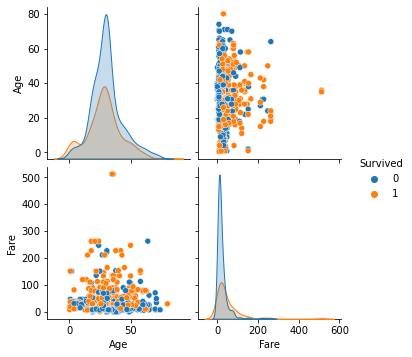

In [8]:
contdata = train_df[["Survived","Age","Fare"]].copy()

sns.pairplot(contdata ,hue = "Survived" )
plt.show()

          Survived       Age      Fare
Survived  1.000000 -0.080453  0.257307
Age      -0.080453  1.000000  0.089079
Fare      0.257307  0.089079  1.000000


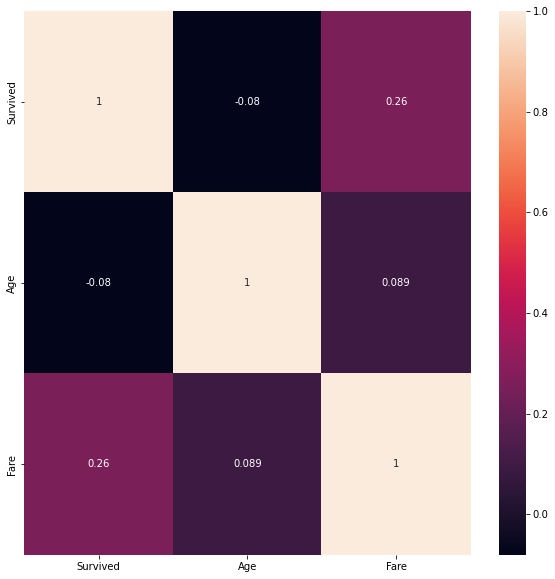

In [9]:
print(contdata.corr())
plt.figure(figsize=(10,10))
sns.heatmap(contdata.corr(),annot=True)
plt.show()

C:\Users\pchandramouli\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pchandramouli\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pchandramouli\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

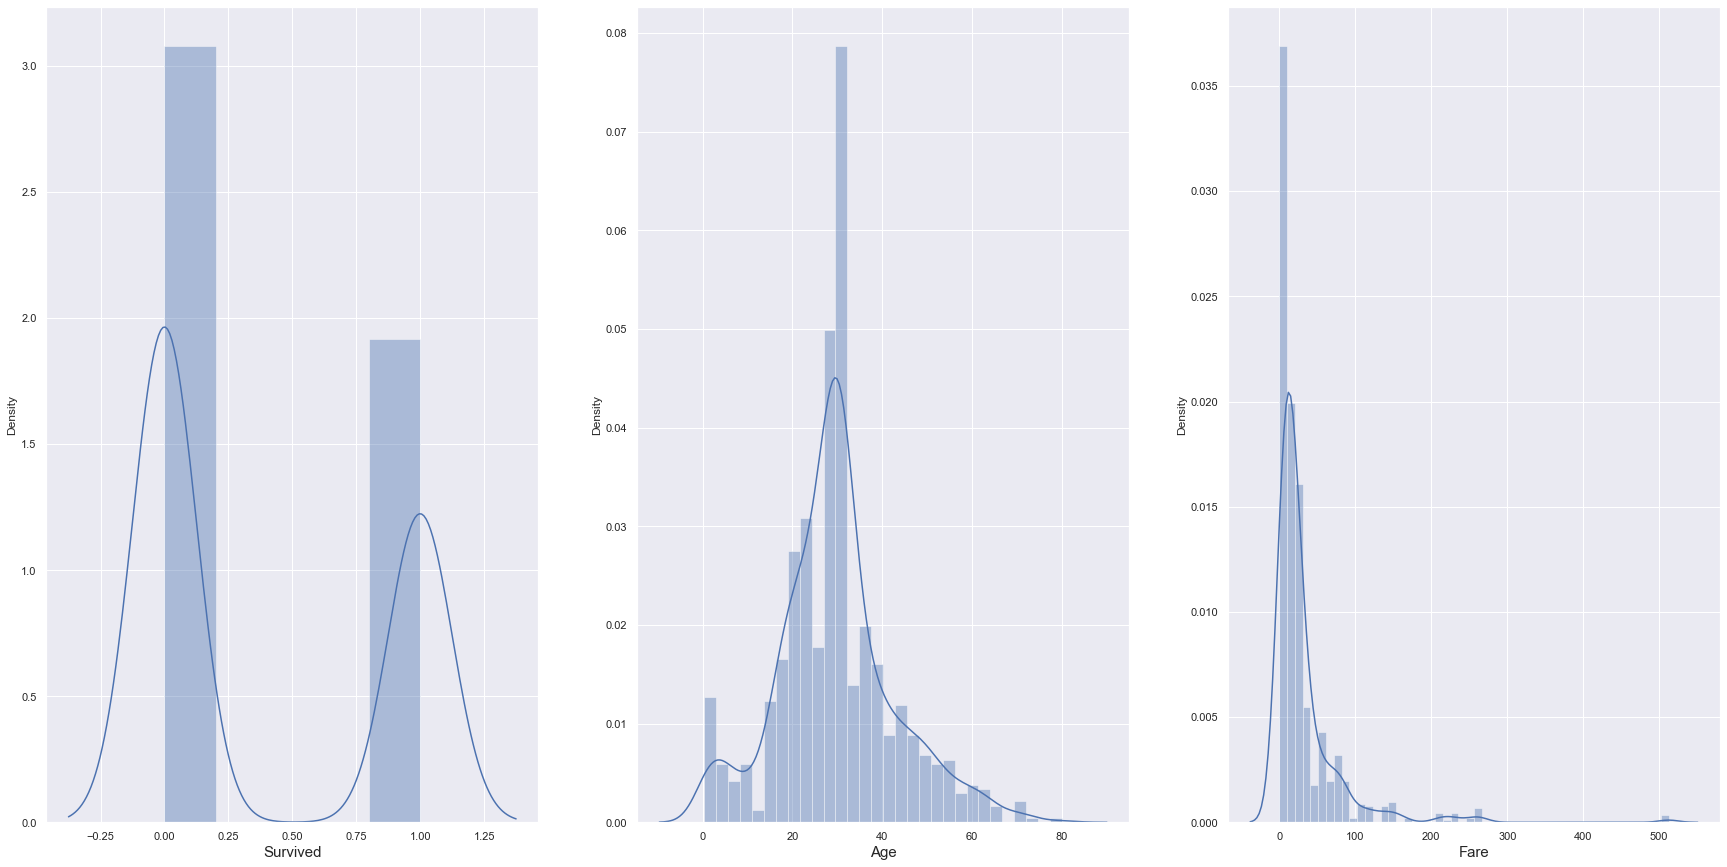

In [10]:
contdatalist = contdata.columns.values.tolist()
col=len(contdatalist)
a = 1
sns.set(rc={'figure.figsize':(30,15)})
for i in range(len(contdatalist)):
    plt.subplot(1,col,a)
    sns.distplot(train_df[contdatalist[i]],kde=True,hist=True)
    
    plt.xlabel(contdatalist[i],fontsize = 15)
    a +=1
        
#plt.subplots_adjust(hspace = 0.4)
plt.show()

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

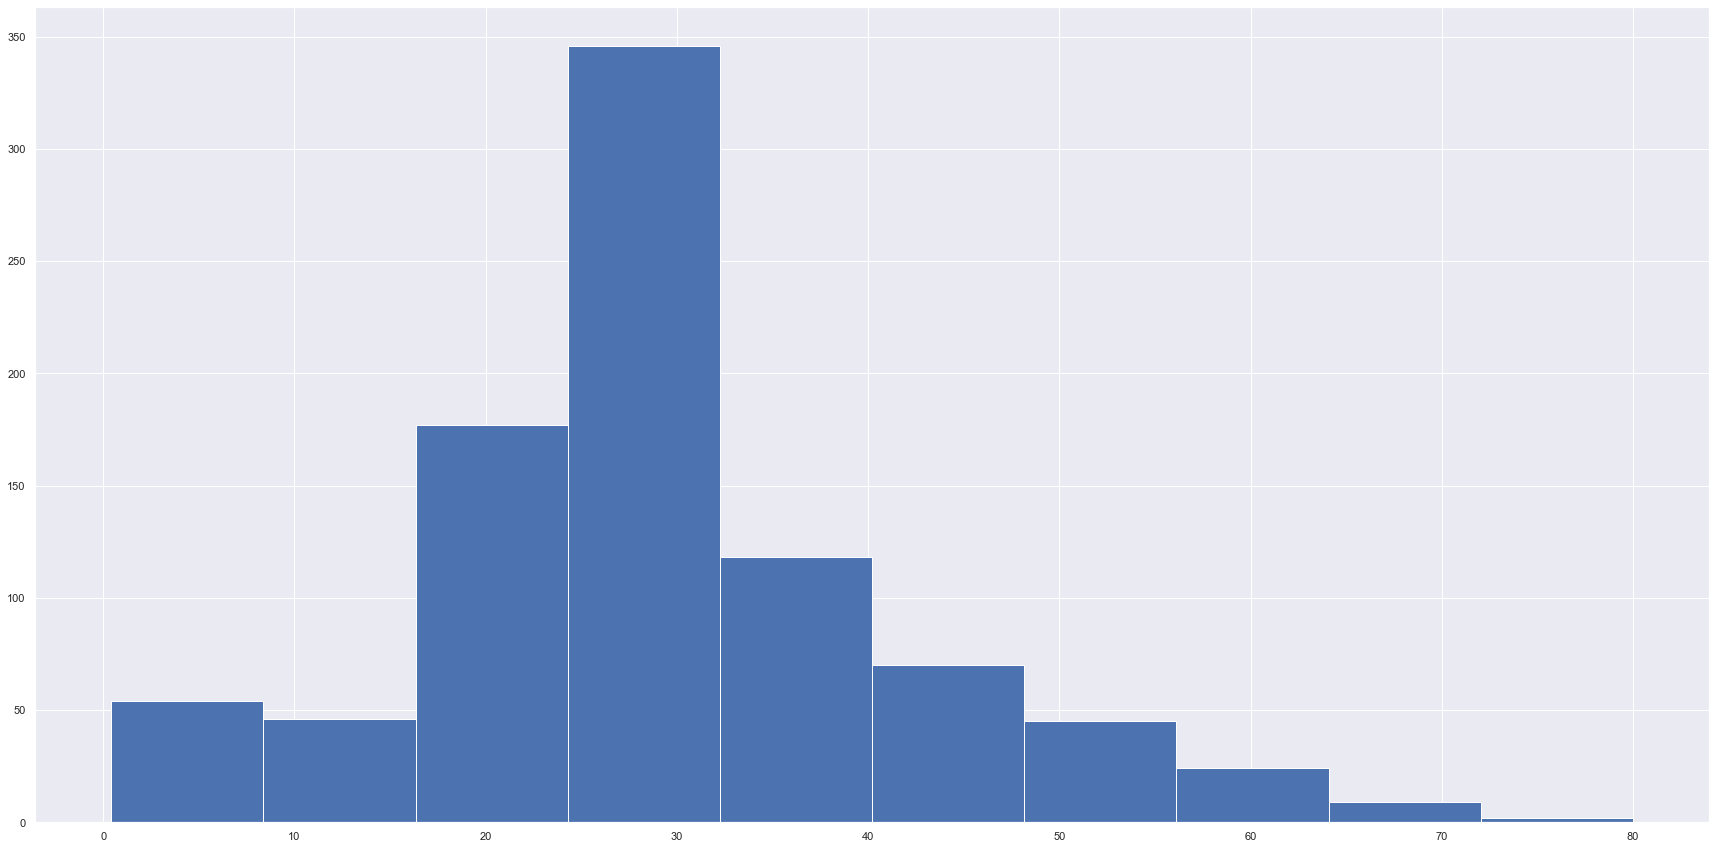

In [11]:
plt.hist(train_df["Age"].values)

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

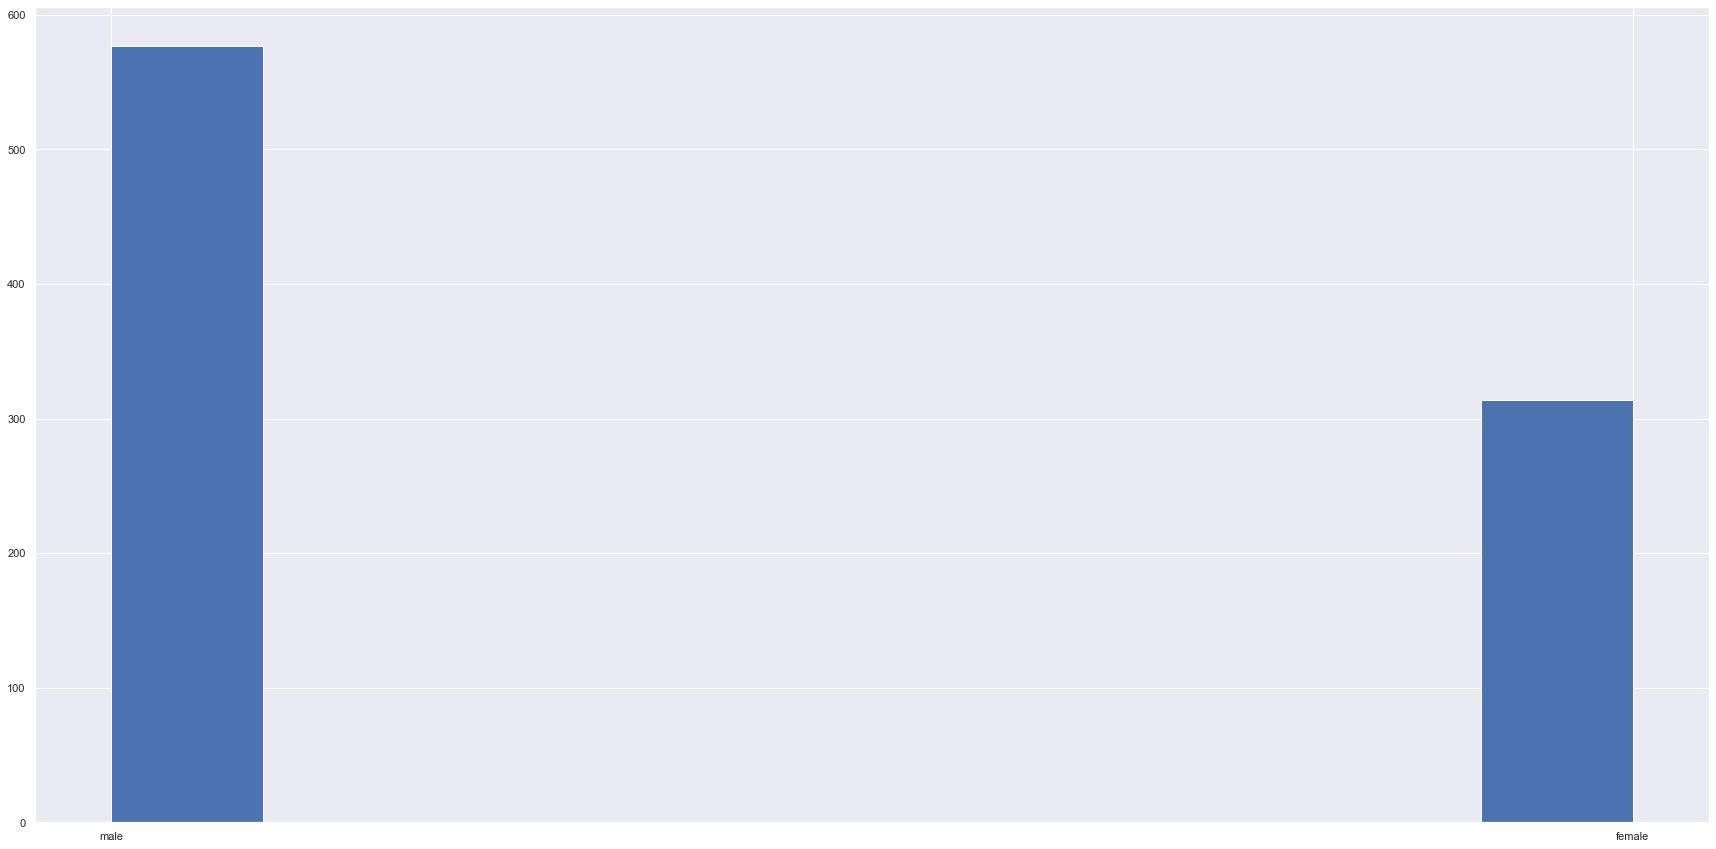

In [12]:
plt.hist(train_df["Sex"].values)

In [13]:
def show_group_stats_viz(df, group):
    print(df.groupby(group).size())
    print(df.groupby(group).size().plot(kind='barh'))



Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


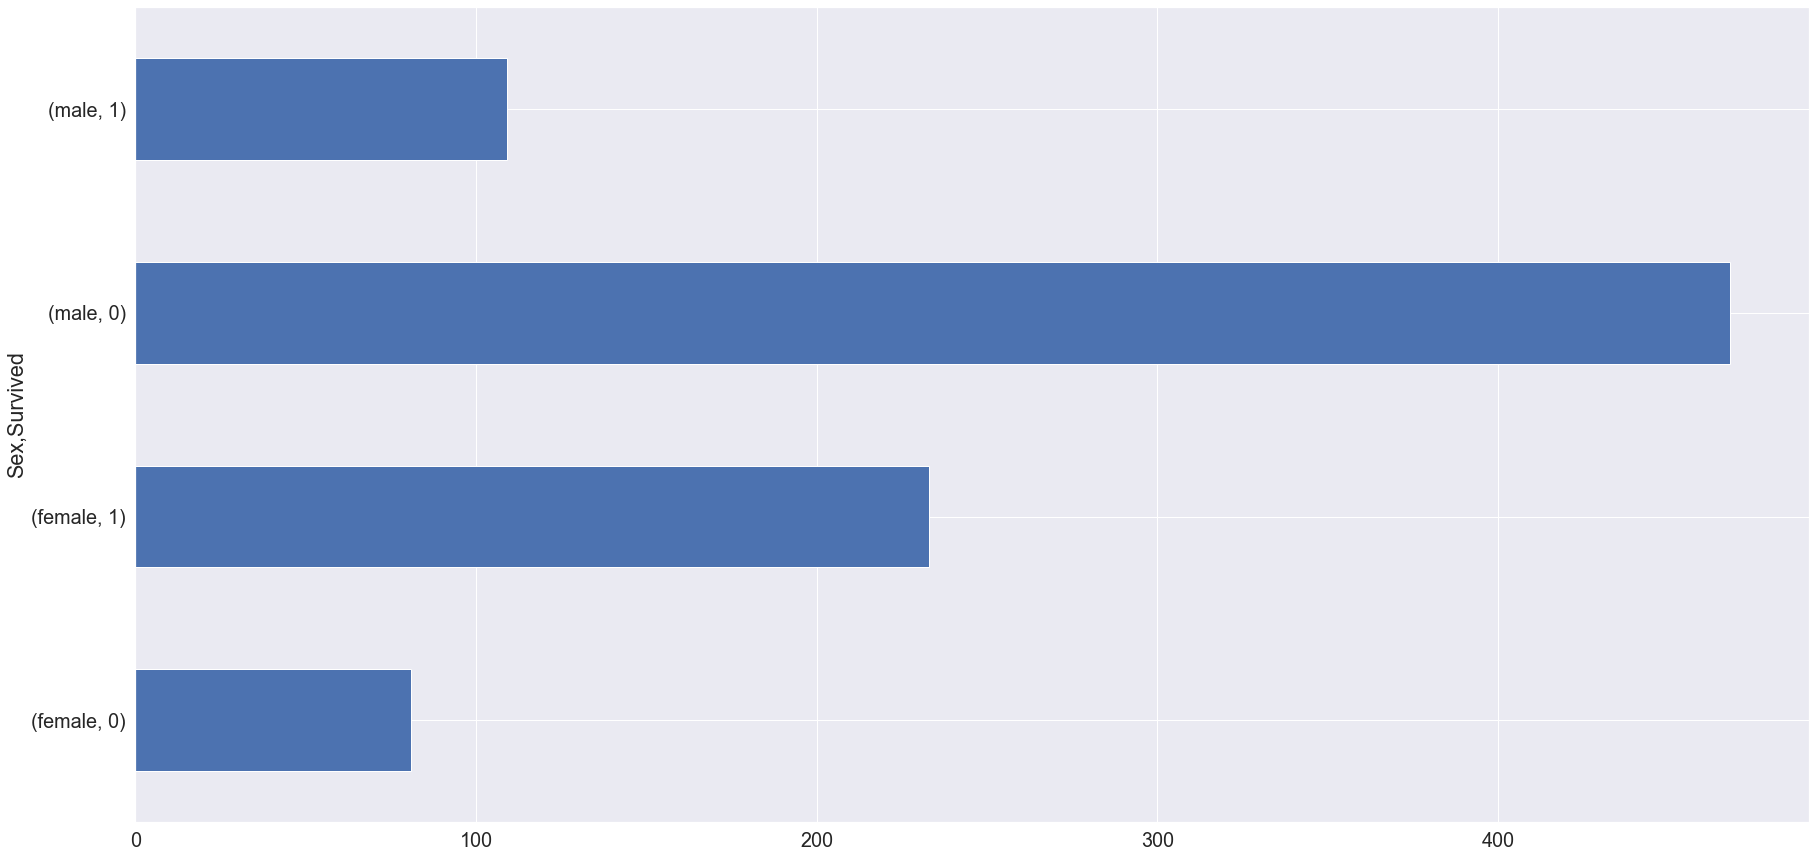

In [14]:
# count out of people survived ahow many were Male or Female
survived_male=len(train_df[(train_df.Sex=='male') & (train_df['Survived']==1)])
survived_fmale=len(train_df[(train_df.Sex=='female') & (train_df['Survived']==1)])

# the grid shows that more than 150 women survived however only 80 men survived.
sns.set(font_scale=1.8)
show_group_stats_viz(train_df,['Sex','Survived'])

#sns.barplot(x=train_df['Pclass'],y=train_df['Survived'],hue=train_df['Sex'])

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


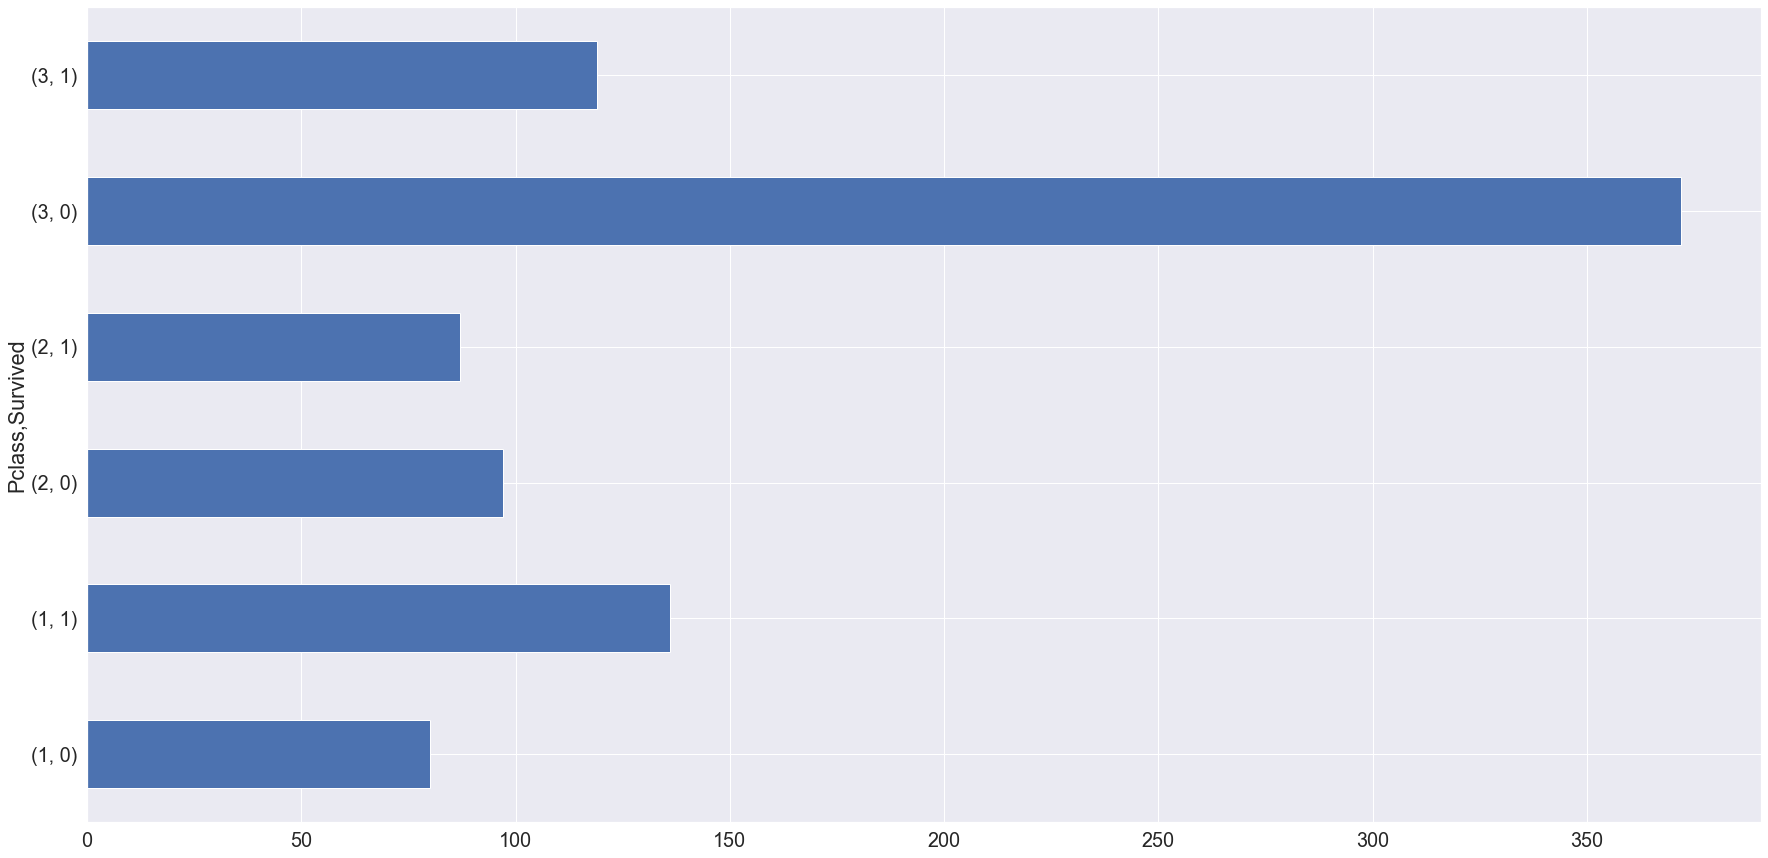

In [15]:
sns.set(font_scale=1.8)
show_group_stats_viz(train_df,['Pclass','Survived'])

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


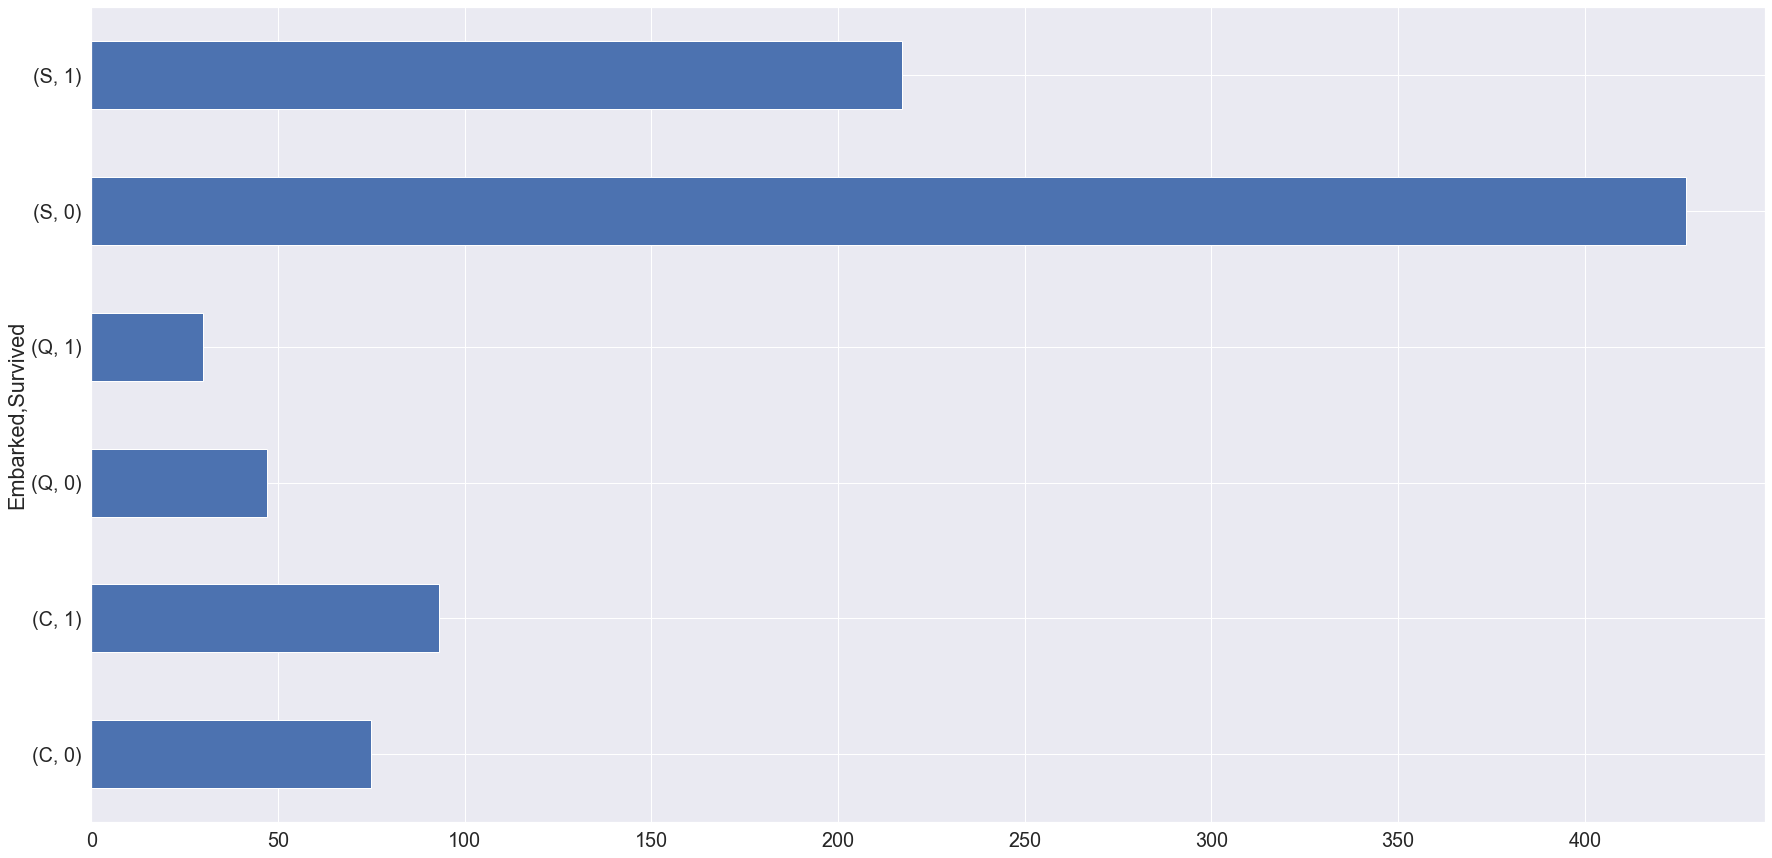

In [16]:
sns.set(font_scale=1.8)
show_group_stats_viz(train_df,['Embarked','Survived'])

### Feature Selection and Building model using desicion tree 

From the above graphs we understand that Gender,PClass,Age plays a significant role in survival. Our feature selection should indicate the very same.


In [17]:
from sklearn import tree


#Map gender to 0 or 1 respectively.
g = {'male': 0, 'female': 1}
train_df['Sex'] = train_df['Sex'].map(g)

e={'C':0,'S':1,'Q':2}
train_df['Embarked'] = train_df['Embarked'].map(e)

#from EDA, majority of "Embarked" are in 'S'
train_df['Embarked']=train_df['Embarked'].fillna(1.0)
train_df['Sex']=train_df['Sex'].fillna(0)

#split training data furhter into train and validation data
train_df,val_df = train_test_split(train_df, test_size=0.3, random_state=0)

features=['Sex','Pclass','Age','Parch','Fare','SibSp','Embarked']
X = train_df[features]
Y=  train_df['Survived']

#create an algorithm to train data based on selected features
titan_classifier = tree.DecisionTreeClassifier()
titan_classifier = titan_classifier.fit(X, Y)

In [18]:
# run the algorithm through Val data
val_df['Survived-Alg']=titan_classifier.predict(val_df[features])
val_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived-Alg
495,496,0,3,"Yousseff, Mr. Gerious",0,30.726645,0,0,2627,14.4583,NaN,0.0,0
648,649,0,3,"Willey, Mr. Edward",0,30.726645,0,0,S.O./P.P. 751,7.5500,NaN,1.0,0
278,279,0,3,"Rice, Master. Eric",0,7.000000,4,1,382652,29.1250,NaN,2.0,0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,27.915709,1,0,PC 17569,146.5208,B78,0.0,1
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",1,29.000000,0,2,2650,15.2458,NaN,0.0,0
298,299,1,1,"Saalfeld, Mr. Adolphe",0,30.726645,0,0,19988,30.5000,C106,1.0,0
609,610,1,1,"Shutes, Miss. Elizabeth W",1,40.000000,0,0,PC 17582,153.4625,C125,1.0,1
318,319,1,1,"Wick, Miss. Mary Natalie",1,31.000000,0,2,36928,164.8667,C7,1.0,1
484,485,1,1,"Bishop, Mr. Dickinson H",0,25.000000,1,0,11967,91.0792,B49,0.0,1
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",1,27.915709,0,0,2626,7.2292,NaN,0.0,1


In [19]:
#Calculate confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("*****************CONFUSION MATRIX******************\n")
print(confusion_matrix(val_df['Survived'], val_df['Survived-Alg']))


print("*****************CLASSIFICATION  REPORT******************")
print(classification_report(val_df['Survived'], val_df['Survived-Alg']))

*****************CONFUSION MATRIX******************

[[139  29]
 [ 35  65]]
*****************CLASSIFICATION  REPORT******************
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       168
           1       0.69      0.65      0.67       100

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



In [20]:
#Determine performance metrics.
from sklearn.metrics import auc, f1_score, roc_auc_score, recall_score, precision_score

print("AUC score : ",roc_auc_score(val_df['Survived'], val_df['Survived-Alg']))
print("F1 score : ", f1_score(val_df['Survived'], val_df['Survived-Alg'], average='weighted'))
print("Precision score: ", precision_score(val_df['Survived'], val_df['Survived-Alg'], average='micro'))
print("Recall score : ", recall_score(val_df['Survived'], val_df['Survived-Alg'], average='micro'))

AUC score :  0.7386904761904761
F1 score :  0.7595959432355315
Precision score:  0.7611940298507462
Recall score :  0.7611940298507462


#### Build Model using Random Forrest.

In [57]:
from sklearn.ensemble import RandomForestClassifier

Random_Titanic_classifier = RandomForestClassifier(n_estimators=8)
Random_Titanic_classifier = Random_Titanic_classifier.fit(X, Y)


# run the algorithm through Val data
val_df['Survived-Alg']=Random_Titanic_classifier.predict(val_df[features])


In [58]:
#Calculate confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("*****************CONFUSION MATRIX******************\n")
print(confusion_matrix(val_df['Survived'], val_df['Survived-Alg']))


print("*****************CLASSIFICATION  REPORT******************")
print(classification_report(val_df['Survived'], val_df['Survived-Alg']))

*****************CONFUSION MATRIX******************

[[149  19]
 [ 28  72]]
*****************CLASSIFICATION  REPORT******************
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       168
           1       0.79      0.72      0.75       100

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [59]:
#Determine performance metrics.
from sklearn.metrics import auc, f1_score, roc_auc_score, recall_score, precision_score

print("AUC score : ",roc_auc_score(val_df['Survived'], val_df['Survived-Alg']))
print("F1 score : ", f1_score(val_df['Survived'], val_df['Survived-Alg'], average='weighted'))
print("Precision score: ", precision_score(val_df['Survived'], val_df['Survived-Alg'], average='micro'))
print("Recall score : ", recall_score(val_df['Survived'], val_df['Survived-Alg'], average='micro'))

AUC score :  0.8034523809523809
F1 score :  0.82278251356466
Precision score:  0.8246268656716418
Recall score :  0.8246268656716418


#### Build Model using Gradient Booster.

#### CleanUp Test Data


In [60]:
test_df['Age'].loc[(test_df['Sex']=='female') & test_df.Age.isnull()]=avg_fmale
test_df['Age'].loc[test_df.Age.isnull()]=avg_male

#Map gender to 0 or 1 respectively.
g = {'male': 0, 'female': 1}
test_df['Sex'] = test_df['Sex'].map(g)

e={'C':0,'S':1,'Q':2}
test_df['Embarked'] = test_df['Embarked'].map(e)

#from EDA, majority of "Embarked" are in 'S'
test_df['Embarked']=test_df['Embarked'].fillna(1.0)
test_df['Sex']=test_df['Sex'].fillna(0)
test_df['Fare']=test_df['Fare'].fillna(0)

test_df.head(10)

C:\Users\pchandramouli\Miniconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Survived
0,892,3,"Kelly, Mr. James",0.0,34.5,0,0,330911,7.8292,NaN,1.0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0.0,47.0,1,0,363272,7.0000,NaN,1.0,0,0
2,894,2,"Myles, Mr. Thomas Francis",0.0,62.0,0,0,240276,9.6875,NaN,1.0,0,0
3,895,3,"Wirz, Mr. Albert",0.0,27.0,0,0,315154,8.6625,NaN,1.0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.0,22.0,1,1,3101298,12.2875,NaN,1.0,0,0
5,897,3,"Svensson, Mr. Johan Cervin",0.0,14.0,0,0,7538,9.2250,NaN,1.0,0,0
6,898,3,"Connolly, Miss. Kate",0.0,30.0,0,0,330972,7.6292,NaN,1.0,0,0
7,899,2,"Caldwell, Mr. Albert Francis",0.0,26.0,1,1,248738,29.0000,NaN,1.0,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0.0,18.0,0,0,2657,7.2292,NaN,1.0,0,0
9,901,3,"Davies, Mr. John Samuel",0.0,21.0,2,0,A/4 48871,24.1500,NaN,1.0,0,0


In [61]:
test_df['Survived']=Random_Titanic_classifier.predict(test_df[features]) #   titan_classifier

test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Survived
0,892,3,"Kelly, Mr. James",0.0,34.500000,0,0,330911,7.8292,NaN,1.0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0.0,47.000000,1,0,363272,7.0000,NaN,1.0,0,0
2,894,2,"Myles, Mr. Thomas Francis",0.0,62.000000,0,0,240276,9.6875,NaN,1.0,0,0
3,895,3,"Wirz, Mr. Albert",0.0,27.000000,0,0,315154,8.6625,NaN,1.0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.0,22.000000,1,1,3101298,12.2875,NaN,1.0,0,0
5,897,3,"Svensson, Mr. Johan Cervin",0.0,14.000000,0,0,7538,9.2250,NaN,1.0,0,0
6,898,3,"Connolly, Miss. Kate",0.0,30.000000,0,0,330972,7.6292,NaN,1.0,0,0
7,899,2,"Caldwell, Mr. Albert Francis",0.0,26.000000,1,1,248738,29.0000,NaN,1.0,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0.0,18.000000,0,0,2657,7.2292,NaN,1.0,0,0
9,901,3,"Davies, Mr. John Samuel",0.0,21.000000,2,0,A/4 48871,24.1500,NaN,1.0,0,0


In [62]:
submission=['PassengerId','Survived']
df = test_df[submission]
df.to_csv('paddy_chandra_submission.csv', sep=',',index=False)